In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("train.csv", sep=";")

In [3]:
df = df1.copy(deep=False)

In [4]:
cols_useless = [
'color_rgb',
'image_embedding',
'phase_in',
'phase_out',
'life_cycle_length',
'has_plus_sizes',
'year',
'Production',
'weekly_sales',
]

df = df.drop(cols_useless, axis=1)

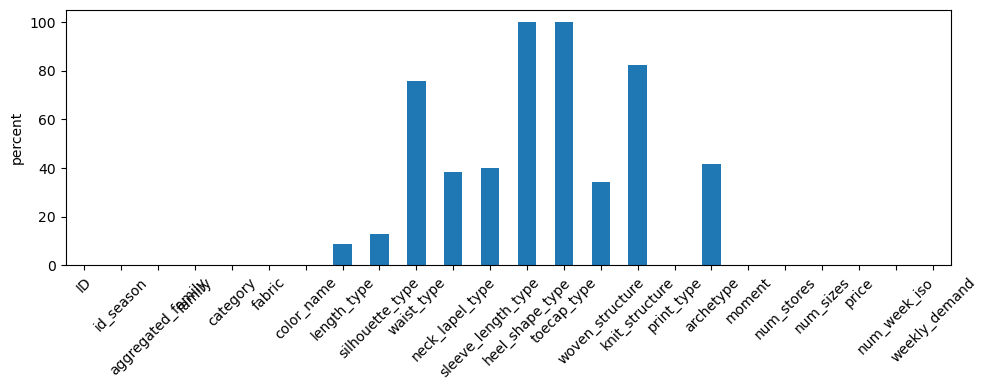

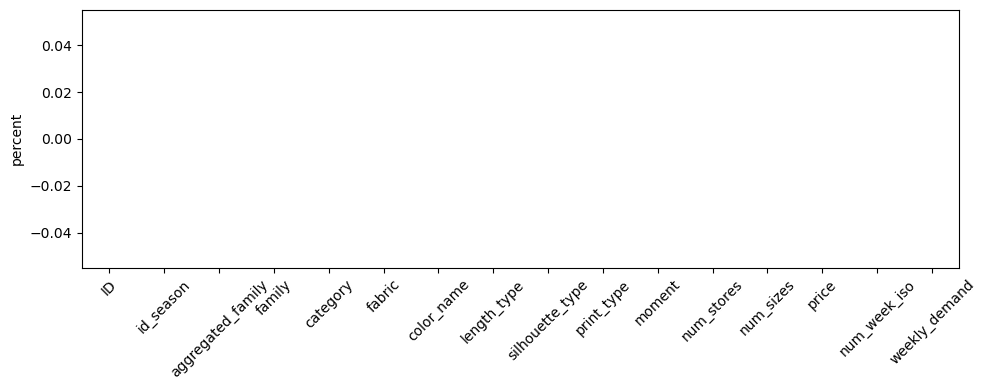

In [5]:
percent = df.isna().mean() * 100

plt.figure(figsize=(10,4))
percent.plot(kind="bar")
plt.ylabel("percent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df = df.loc[:, df.isna().mean() < 0.20] # only keep attributes that have less than 20% NaNs
df = df.dropna() #remove rows that have NaNs


percent = df.isna().mean() * 100

plt.figure(figsize=(10,4))
percent.plot(kind="bar")
plt.ylabel("percent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2656
ID                  0
id_season           0
num_stores          0
num_sizes           0
price               0
num_week_iso        0
weekly_demand    2656
dtype: int64
ID               0
id_season        0
num_stores       0
num_sizes        0
price            0
num_week_iso     0
weekly_demand    0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

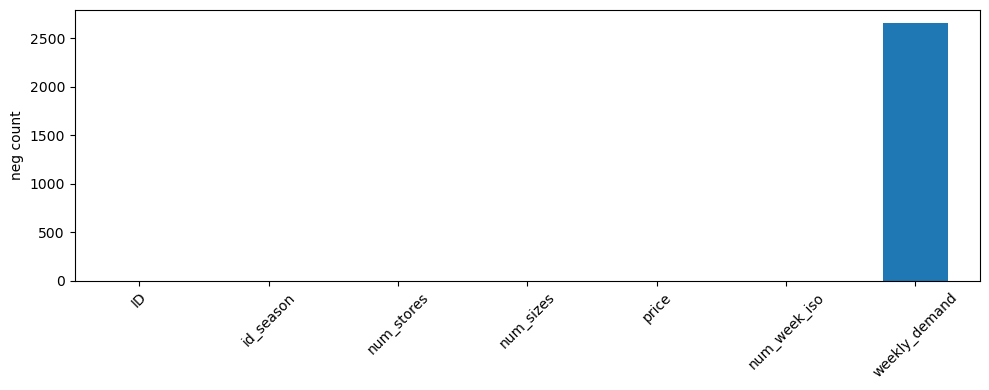

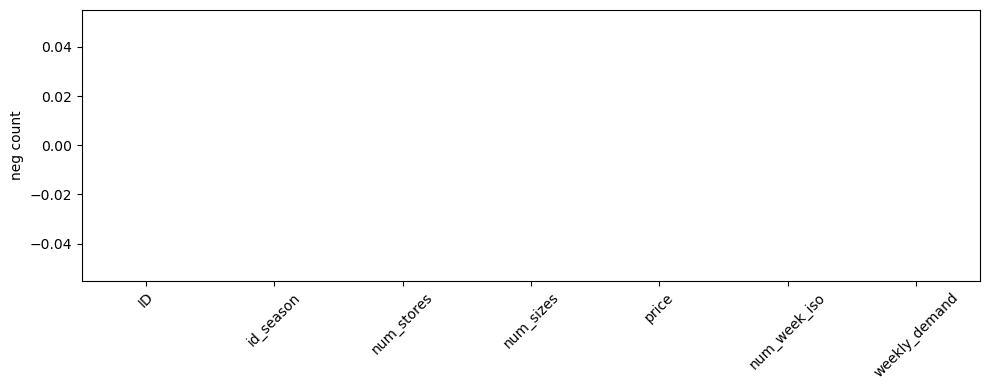

In [6]:
neg_rows = (df.select_dtypes(include="number") < 0).any(axis=1).sum() # number of rows that contain some negative value
print(neg_rows)

neg_counts = (df.select_dtypes(include="number") < 0).sum() # for each column, it says how many negative rows there are
print(neg_counts)

# plot of number of negative rows per column
plt.figure(figsize=(10,4))
neg_counts.plot(kind="bar")
plt.ylabel("neg count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show


df["weekly_demand"] = df["weekly_demand"].clip(lower=0) # we put negative rows at 0

neg_counts = (df.select_dtypes(include="number") < 0).sum() # for each column, it says how many negative rows there are
print(neg_counts)

# plot of number of negative rows per column
plt.figure(figsize=(10,4))
neg_counts.plot(kind="bar")
plt.ylabel("neg count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [7]:
print(df.shape[1]) # number of variables we are left with


16


In [8]:
print(df.dtypes)


df = df.astype({c: "float64" for c in df.select_dtypes("int64").columns})
cols = ["ID", "id_season", "num_week_iso"]
df[cols] = df[cols].astype("object")

print(df.dtypes)



ID                     int64
id_season              int64
aggregated_family     object
family                object
category              object
fabric                object
color_name            object
length_type           object
silhouette_type       object
print_type            object
moment                object
num_stores             int64
num_sizes              int64
price                float64
num_week_iso           int64
weekly_demand          int64
dtype: object
ID                    object
id_season             object
aggregated_family     object
family                object
category              object
fabric                object
color_name            object
length_type           object
silhouette_type       object
print_type            object
moment                object
num_stores           float64
num_sizes            float64
price                float64
num_week_iso          object
weekly_demand        float64
dtype: object


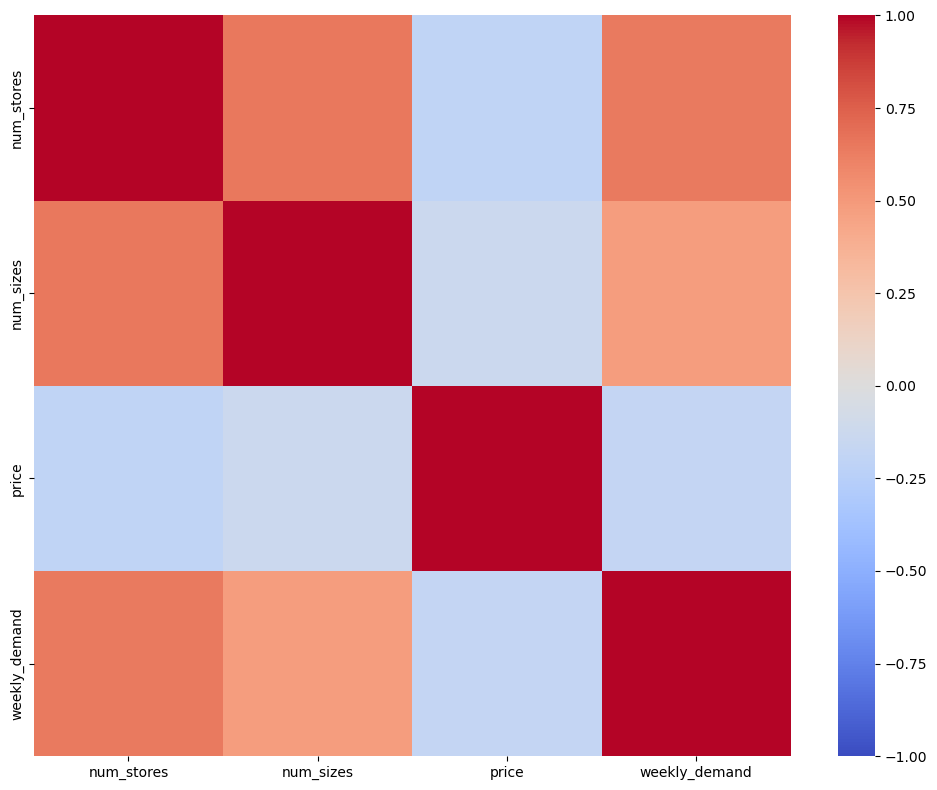

In [9]:
num = df.select_dtypes("number")
corr = num.corr()

corr = df.select_dtypes("number").corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

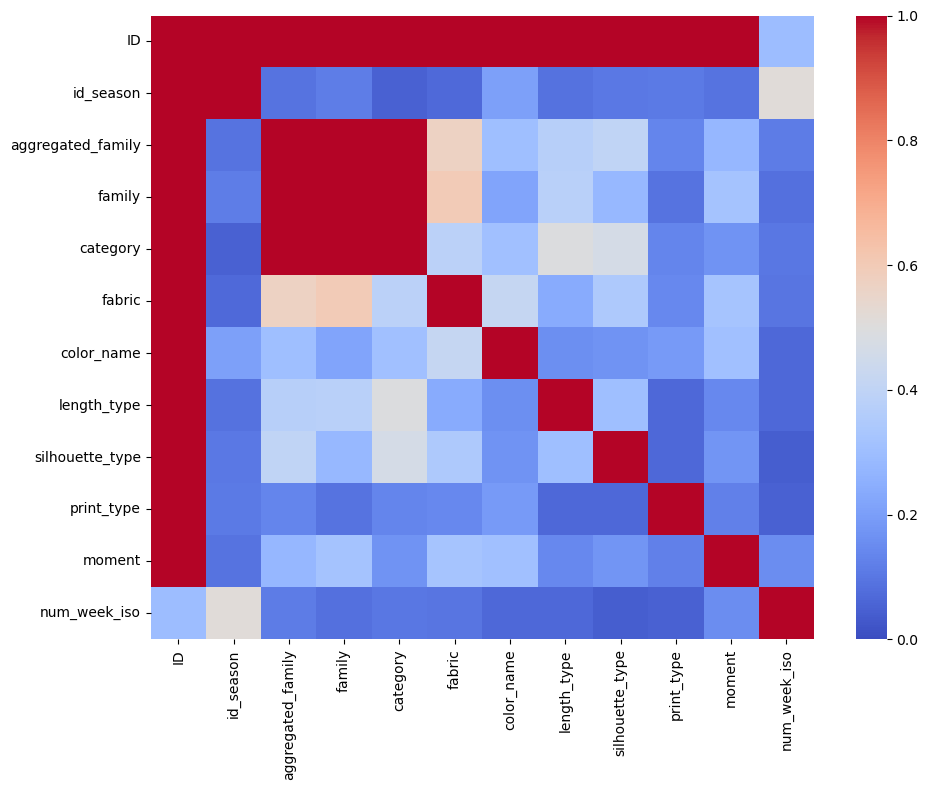

In [10]:

def cramers_v(x, y):
    t = pd.crosstab(x, y)
    chi2 = chi2_contingency(t)[0]
    n = t.sum().sum()
    return np.sqrt(chi2 / (n * (min(t.shape)-1)))

cats = df.select_dtypes("object").columns
mat = pd.DataFrame(index=cats, columns=cats, dtype=float)

for a in cats:
    for b in cats:
        mat.loc[a, b] = cramers_v(df[a], df[b])

plt.figure(figsize=(10,8))
sns.heatmap(mat.astype(float), cmap="coolwarm", vmin=0, vmax=1)
plt.tight_layout()
plt.show()


In [11]:
# we delete 2/3 correlated variables and we keep 'family'

cols_useless = [
'aggregated_family',
'category',
]

df = df.drop(cols_useless, axis=1)


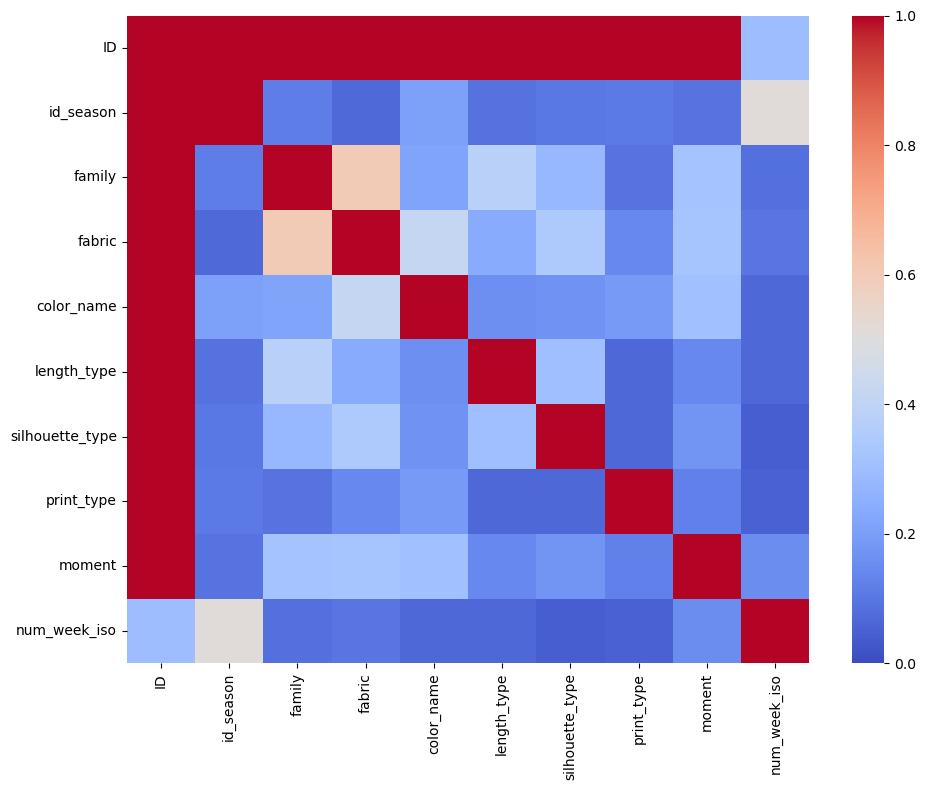

In [12]:

def cramers_v(x, y):
    t = pd.crosstab(x, y)
    chi2 = chi2_contingency(t)[0]
    n = t.sum().sum()
    return np.sqrt(chi2 / (n * (min(t.shape)-1)))

cats = df.select_dtypes("object").columns
mat = pd.DataFrame(index=cats, columns=cats, dtype=float)

for a in cats:
    for b in cats:
        mat.loc[a, b] = cramers_v(df[a], df[b])

plt.figure(figsize=(10,8))
sns.heatmap(mat.astype(float), cmap="coolwarm", vmin=0, vmax=1)
plt.tight_layout()
plt.show()


In [13]:
df.to_csv("train_ready.csv", index=False)